# <center>Unravel Spirals<center>

- First part of the "Skeletonize section" allows you to just run one image at a time to see the output and play around with the thresholding, blurring, and dilation/erosion parameters.
- The second part combines those cells into one in a for loop that you can run to skeletonize all images in a folder

--------
Process to unravel spirals:
 - Take image as input, and skeletonize
 - Clean up the skeleton (no gaps or branches)
 - Unravel the skeleton 
    - Account for cross over

**10/28/22 - as of now, this file only skeletonizes the images**

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from skimage.morphology import skeletonize, thin
from scipy import ndimage

c:\Users\Rebecca\anaconda3\envs\MLEnv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <center> Step 1: Skeletonize<center>

In [83]:
# load image
dir = os.getcwd()
filename = 'V03PO01.png'
imgPath = dir + '/datasets/folador_skeletonize/_archive/waves/' + filename
img = cv2.imread(imgPath, 1)
# img = cv2.resize(img, (1000, 1000))

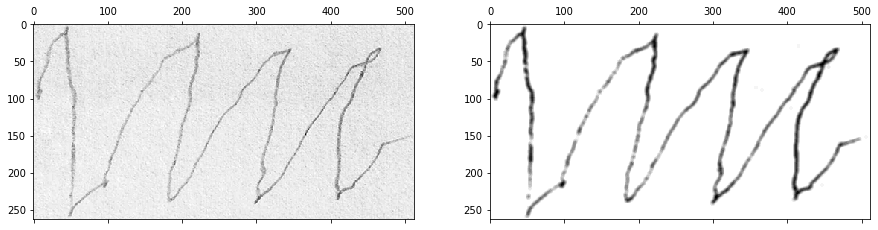

In [87]:
# ----- CONVERT TO BINARY IMAGE -----
# convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_gray = cv2.blur(img_gray, (7, 7))
# img_gray = cv2.medianBlur(img_gray, 9)

nx = np.shape(img_gray)[0]
ny = np.shape(img_gray)[1]

# use otsu's method to binarize
_, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
# thresh = np.mean(img_gray)
# error = 255 - thresh
# thresh = thresh - error

# # binarize the image
# _, img_bin = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)

img_bin_blurred = ndimage.median_filter(img_bin, size=2)
img_bin_blurred = cv2.blur(img_bin_blurred, (5,5))
img_bin_blurred = cv2.medianBlur(img_bin_blurred, 3)


fig, ax = plt.subplots(1,2,figsize=(15,20))
ax[0].matshow(img_gray, cmap='gray')
ax[1].matshow(img_bin_blurred, cmap='gray')

True

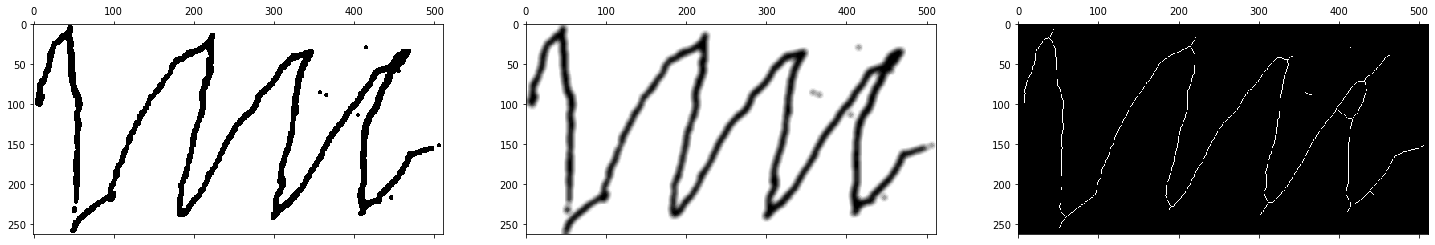

In [88]:
# ----- THIN TO ONE-PIXEL WIDTH -----
# dilate
size1 = 1
size2 = 2
element1 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*size1+1,2*size1+1), anchor=(size1,size1))
element2 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*size2+1,2*size2+1), anchor=(size2,size2))

# img_morph = cv2.erode(img_bin_blurred, element1)
# img_morph = cv2.blur(img_bin_blurred, (5,5))
# img_morph = cv2.medianBlur(img_morph, 9)

# _, img_bin_blurred = cv2.threshold(img_morph, 0, 255, cv2.THRESH_BINARY)
img_morph = img_bin_blurred
for y in range(ny):
    for x in range(nx):
        if img_morph[x][y] != 255:
            img_morph[x][y] = 0

# img_morph = cv2.dilate(img_morph, element1)
# img_morph = cv2.dilate(img_morph, element2)



img_morph = cv2.blur(img_morph, (7,7))
img_morph = cv2.medianBlur(img_morph, 5)

img_bin_norm = img_morph / 255
img_bin_norm = 1 - img_bin_norm
thinned = thin(img_bin_norm, max_num_iter=500) * 255


fig, ax = plt.subplots(1,3,figsize=(25,30))
ax[0].matshow(img_bin_blurred, cmap='gray')
ax[1].matshow(img_morph, cmap='gray')
ax[2].matshow(thinned, cmap='gray')

savename = 'skel_'+filename
cv2.imwrite(savename, thinned) # save image


### <center>Skeletonize all images in folder<center>

This next code cell combines the code above into a for loop to skeletonize all images in a folder

In [272]:

dir = os.getcwd()
folderPath = dir + '/datasets/folador_skeletonize/_archive/waves/'

for i in os.listdir(folderPath):
    # load image
    img_path = folderPath + i
    img = cv2.imread(img_path, 1)
    # img = cv2.resize(img, (1000, 1000))

    # ----- CONVERT TO BINARY IMAGE -----
    # convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    nx = np.shape(img_gray)[0]
    ny = np.shape(img_gray)[1]

    # use otsu's method to binarize
    _, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

    img_bin_blurred = ndimage.median_filter(img_bin, size=2)
    img_bin_blurred = cv2.blur(img_bin_blurred, (3,3))
    img_bin_blurred = cv2.medianBlur(img_bin_blurred, 5)

    # ----- THIN TO ONE-PIXEL WIDTH -----
    # dilate
    size1 = 1
    size2 = 2
    element1 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*size1+1,2*size1+1), anchor=(size1,size1))
    element2 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*size2+1,2*size2+1), anchor=(size2,size2))

    # _, img_bin_blurred = cv2.threshold(img_morph, 0, 255, cv2.THRESH_BINARY)
    img_morph = img_bin_blurred
    for y in range(ny):
        for x in range(nx):
            if img_morph[x][y] != 255:
                img_morph[x][y] = 0

    img_bin_norm = img_morph / 255
    img_bin_norm = 1 - img_bin_norm
    thinned = thin(img_bin_norm, max_num_iter=250) * 255

    ## UNCOMMENT TO SAVE IMAGES
    # saveImg = cv2.resize(thinned, (256,256))
    savefolder = dir + '/datasets/folador_skeletonize/skeletons/waves/'
    savename = savefolder + 'skel_' + i
    cv2.imwrite(savename , thinned)


## <center>Manually remove small branches<center>

edit img


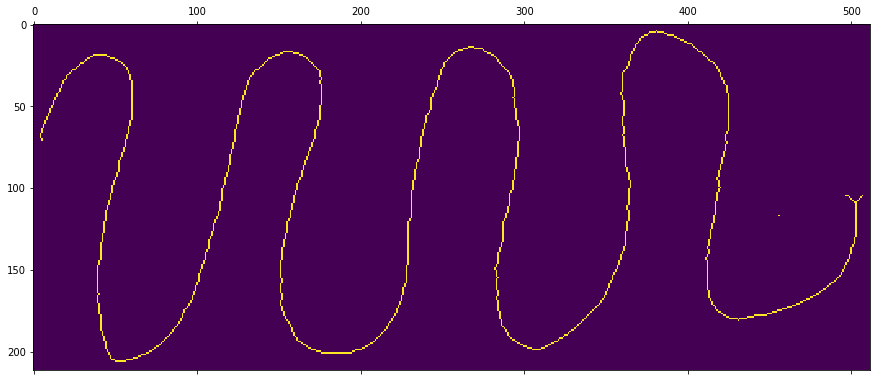

In [78]:
dir = os.getcwd()
imgPath = dir + '/datasets/folador_skeletonize/skeletons/waves/skel_V03HO03.png'
img = cv2.imread(imgPath, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.matshow(img, fignum=1)

print('edit img')

In [79]:
from code_files.archSpiral import unravelSpiral

# find the center of the image
c = unravelSpiral(img)
# halfpt = int(np.shape(img)[0] / 2) # go halfway down the image, and iterate over until hit the spiral
# for i in range(len(img)):
#     if img[halfpt][i] == 255:
#         c = [halfpt, i]
#         break


# row = c[0]
# col = c[1]

# c = [row, col]
# print(c)

# c = [91,4]

In [80]:
def findConnectingPixels(x,y, spiralPixels, hereToo):
    connectedPixels = []
    
    # check the top row (R to L)
    if (img[x-1][y+1] == 255) & ([x-1,y+1] not in spiralPixels) & ([x-1,y+1] not in hereToo):
        connectedPixels.append([x-1,y+1])
    if (img[x-1][y] == 255) & ([x-1,y] not in spiralPixels) & ([x-1,y] not in hereToo):
        connectedPixels.append([x-1,y])
    if (img[x-1][y-1] == 255) & ([x-1,y-1] not in spiralPixels) & ([x-1,y-1] not in hereToo):
        connectedPixels.append([x-1,y-1])

    # check to the left (L to BL)
    if (img[x][y-1] == 255) & ([x,y-1] not in spiralPixels) & ([x,y-1] not in hereToo):
        connectedPixels.append([x,y-1])
    if (img[x+1][y-1] == 255) & ([x+1,y-1] not in spiralPixels) & ([x+1,y-1] not in hereToo):
        connectedPixels.append([x+1,y-1])

    # check below (B to BR)
    if (img[x+1][y] == 255) & ([x+1,y] not in spiralPixels) & ([x+1,y] not in hereToo):
        connectedPixels.append([x+1,y])
    if (img[x+1][y+1] == 255) & ([x+1,y+1] not in spiralPixels) & ([x+1,y+1] not in hereToo):
        connectedPixels.append([x+1,y+1])

    # check to the right
    if (img[x][y+1] == 255) & ([x,y+1] not in spiralPixels) & ([x,y+1] not in hereToo):
        connectedPixels.append([x,y+1])

    return connectedPixels

In [81]:
# remove small branches from the spiral
atEnd1 = False; atEnd2 = False
branch1 = []
branch2 = []
pixels2remove = []
spiralPixels = []

x = c[0]
y = c[1]
prevx = 0
prevy = 0
while not (atEnd1 & atEnd2):

    spiralPixels.append([x,y])

    # ---------------------------
    # Starting with the calculated center point, store the pixel locations of all connected pixels
    # Do not include the previous center pixel value
    # ---------------------------
    connectedPixels = findConnectingPixels(x,y, spiralPixels,[])


    # ---------------------------
    # if there are two connected pixels, then a junction has been reached
    # need to follow the path of each branch and store the pixel locations of the pixels in each branch
    # then compare the lengths of the branches, and push the shorter branch pixel locations to be zero
    # ---------------------------
    if len(connectedPixels) == 0: # the end of the spiral has been reached
        print('No branches to remove')
        atEnd2=True; atEnd1=True
    elif len(connectedPixels) == 1: # if there is only one connected pixel, update the center value and continue
        # update the center pixel value
        prevx = x; prevy = y

        x = connectedPixels[0][0]
        y = connectedPixels[0][1]
        connectedPixels = []
    else: # two pixel values means a junction has occured and there is a small branch that needs to be removed
        print('REACHED A JUNCTION')
        print("center location: ", [x,y])

        # update the center pixel value
        prevx = x; prevy = y

        # if one of the branches come to an end point, set this to true
        # if both branches are true when done, then remove the shortest,
        # and the end of the spiral has been reached, so need to break 
        # the outer while loop
        branch1Ends = False 
        branch2Ends = False

        # follow the path of the first branch
        # store the pixel locations of that branch
        notAtEnd = True
        b1x = connectedPixels[0][0]; b1y = connectedPixels[0][1]
        b1_prevx = prevx; b1_prevy = prevy
        branch1 = []
        branch1.append([b1x, b1y])
        while notAtEnd:
            # print('pause in branch 1 computation')
            connectedPixels_b1 = findConnectingPixels(b1x, b1y, spiralPixels, connectedPixels)
            spiralPixels.append([b1x, b1y])
            b1_prevx = b1x; b1_prevy = b1y
            if len(connectedPixels_b1) == 1:
                b1x = connectedPixels_b1[0][0]
                b1y = connectedPixels_b1[0][1]
                branch1.append([b1x, b1y])
                connectedPixels_b1 = []
            else:
                if len(connectedPixels_b1) == 0:
                    branch1Ends = True
                # branch1.append([b1x, b1y])
                
                notAtEnd = False

        print('done branch1 calculation')

        # follow the path of the second branch
        # store the pixel values for that location
        notAtEnd = True
        b2x = connectedPixels[1][0]; b2y = connectedPixels[1][1]
        b2_prevx = prevx; b2_prevy = prevy
        branch2 = []
        branch2.append([b2x, b2y])
        while notAtEnd:
            # print('pause in branch 2 computation')
            connectedPixels_b2 = findConnectingPixels(b2x, b2y, spiralPixels, connectedPixels)
            spiralPixels.append([b2x, b2y])
            b2_prevx = b2x; b2_prevy = b2y
            if len(connectedPixels_b2) == 1:
                b2x = connectedPixels_b2[0][0]
                b2y = connectedPixels_b2[0][1]
                branch2.append([b2x, b2y])
                connectedPixels_b2 = []
            else:
                if len(connectedPixels_b2) == 0:
                    branch2Ends = True
                # branch2.append([b2x, b2y])
                notAtEnd = False

        print('done branch2 calculation')

        # compare the lengths and remove the pixels of the shorter branch
        # update the x and y coordinates to continue iterating
        if len(branch1) > len(branch2):
            pixels2remove.append(branch2)
            x = b1x; y = b1y
            # update the center pixel value
            prevx = branch1[::-1][1][0]; prevy = branch1[::-1][1][1]
        else:
            pixels2remove.append(branch1)
            x = b2x; y = b2y
            prevx = branch2[::-1][1][0]; prevy = branch2[::-1][1][1]

    # print('pause')

# remove the branch pixels and create pruned image
# iterate through all the pixels in pixels2remove, and set them to 0 in the img
print('removing branches')

newImg = img.copy()
numBranches = len(pixels2remove)
for branch in range(numBranches):
    numPixels = len(pixels2remove[branch])
    for pixels in range(numPixels):
        xval = pixels2remove[branch][pixels][0]
        yval = pixels2remove[branch][pixels][1]
        newImg[xval][yval] = 0

cv2.imshow('img', newImg)
cv2.waitKey()

REACHED A JUNCTION
center location:  [110, 503]
done branch1 calculation
done branch2 calculation
No branches to remove
removing branches


-1

In [82]:
cv2.imwrite(imgPath, newImg)

True

In [ ]:
# unravel the spiral
# need to account for branches though
# if a junction has been reached with two attached points, first go left
#   continue to iterate until an end point or another junction has been reached
#   once another junction has been reached, return to the previous junctions and iterate the other way
#   again, continue until another junction has been reached
#       while iterating, store the pixel locations 
#       compare the lengths, and all pixel locations of the shorter branch to zero
dist_to_center = []
# find the starting point of the spiral
notAtEnd = True
row = c[0]
col = c[1]
prevRow = 0
prevCol = 0

pixelLoc = []
while notAtEnd: # iterate around CCW
    # print('Current RowCol: ', [row, col])

    # check the top row (R to L)
    if (img[row-1][col+1] == 255) & ([row-1,col+1] != [prevRow, prevCol]):
        pixelLoc.append('TR')
    if (img[row-1][col] == 255) & ([row-1,col] != [prevRow, prevCol]):
        pixelLoc.append('T')
    if (img[row-1][col-1] == 255) & ([row-1,col-1] != [prevRow, prevCol]):
        pixelLoc.append('TL')

    # check to the left (L to BL)
    if (img[row][col-1] == 255) & ([row,col-1] != [prevRow, prevCol]):
        pixelLoc.append('L')
    if (img[row+1][col-1] == 255) & ([row+1,col-1] != [prevRow, prevCol]):
        pixelLoc.append('BL')

    # check below (B to BR)
    if (img[row+1][col] == 255) & ([row+1,col] != [prevRow, prevCol]):
        pixelLoc.append('B')
    if (img[row+1][col+1] == 255) & ([row+1,col+1] != [prevRow, prevCol]):
        pixelLoc.append('BR')

    # check to the right
    if (img[row][col+1] == 255) & ([row,col+1] != [prevRow, prevCol]):
        pixelLoc.append('R')

    # if none of the above, it is the end point
    if pixelLoc == []:
        notAtEnd = False

    else:
        # set the prev row and col pixel locations
        prevRow = row
        prevCol = col

        if len(pixelLoc) == 1:
            loc = pixelLoc[0]
        else:
            loc = pixelLoc[1]

        if loc == 'TR':
            row = row-1
            col = col+1
        elif loc == 'T':
            row=row-1
            col=col
        elif loc == 'TL':
            row=row-1
            col=col-1
        elif loc == 'L':
            row=row
            col=col-1
        elif loc == 'BL':
            row=row+1
            col=col-1
        elif loc == 'B':
            row=row+1
            col=col
        elif loc == 'BR':
            row=row+1
            col=col+1
        elif loc == 'R':
            row=row
            col=col+1

    # calculate the distance to the center and store in array
    # row is x, col is y
    dist = np.sqrt((row - c[0])**2 + (col - c[1])**2)
    dist_to_center.append(dist)   

    pixelLoc = []

# <center> -- **ARCHIVED CODE** -- <center>

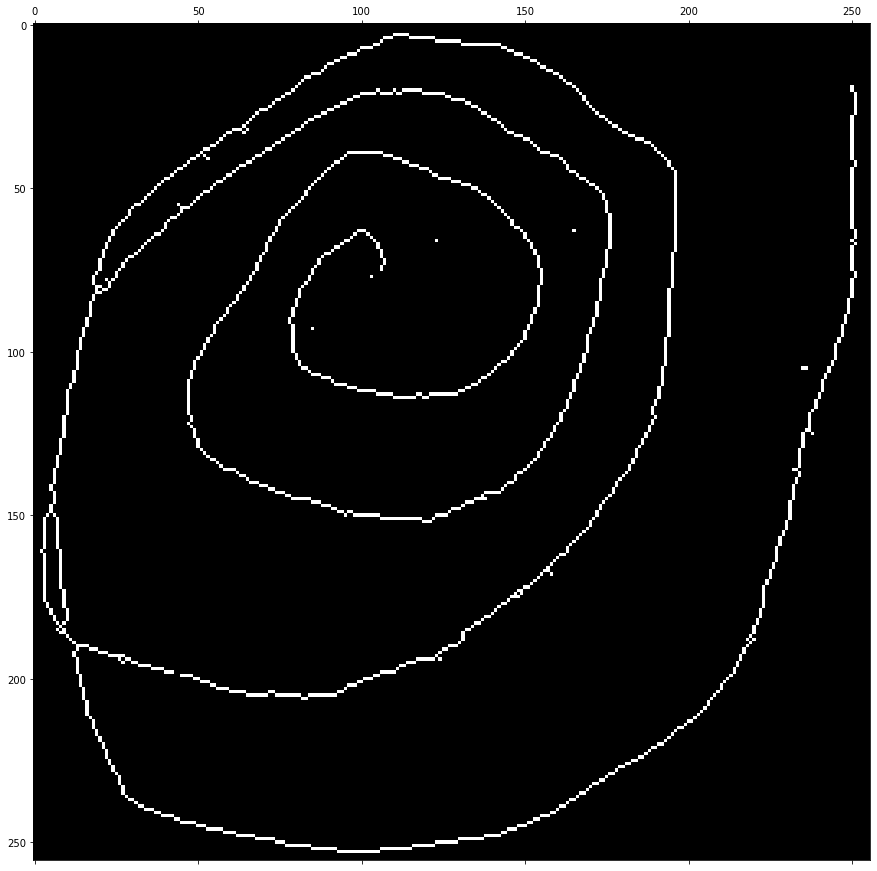

In [91]:
# ----- SKELETONIZE IMAGE -----

img_gray =  np.squeeze(img_gray)
thresh = np.mean(img_gray)
error = 255 - thresh
thresh = thresh - error

# binarize the image
_, img_bin = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_OTSU)
img_bin_norm = img_bin / 255
img_bin_norm = 1 - img_bin_norm

# remove salt-pepper pixels
nx = np.shape(img_gray)[0]
ny = np.shape(img_gray)[1]
bn
# for y in range(1,ny-1):
#     for x in range(1,nx-1):
#         if img_bin_norm[x][y] == 1:
#             pos1 = img_bin_norm[x-1][y-1]; pos2 = img_bin_norm[x-1][y]; pos3 = img_bin_norm[x-1][y+1]
#             pos4 = img_bin_norm[x][y-1];   pos6 = img_bin_norm[x][y+1]
#             pos7 = img_bin_norm[x+1][y-1]; pos8 = img_bin_norm[x+1][y]; pos9 = img_bin_norm[x+1][y+1]
#             if  (pos1 == 1) & np.any([pos2, pos3, pos4, pos6, pos7, pos8, pos9]):
#                 img_bin_norm[x][y] = 0
#                 img_bin_norm[x-1][y-1] = 0

# plt.figure(figsize=(10,10))
# plt.matshow(img_bin_norm, cmap='gray', fignum=1)

# skeleton = skeletonize(img_bin_norm) * 255
thinned = thin(img_bin_norm, max_num_iter=200) * 255
# plt.figure(figsize=(10,10))
# plt.matshow(thinned, cmap='gray', fignum=1)

# apply median filter
# thinned = ndimage.median_filter(thinned, size=2)

# for y in range(1,ny-1):
#     for x in range(1,nx-1):
#         if thinned[x][y] == 255:
#             if (x == 86) & (y == 103):
#                 print('pause')

#             if (thinned[x-1][y-1]==0) & (thinned[x-1][y]==0) & (thinned[x-1][y+1]==0) & \
#             (thinned[x][y-1]==0) & (thinned[x][y+1]==0) & \
#             (thinned[x+1][y-1]==0) & (thinned[x+1][y]==0) & (thinned[x+1][y+1]==0):
#                 thinned[x][y] = 0

plt.figure(figsize=(15,15))
plt.matshow(thinned, cmap='gray', fignum=1)


<Figure size 720x720 with 0 Axes>

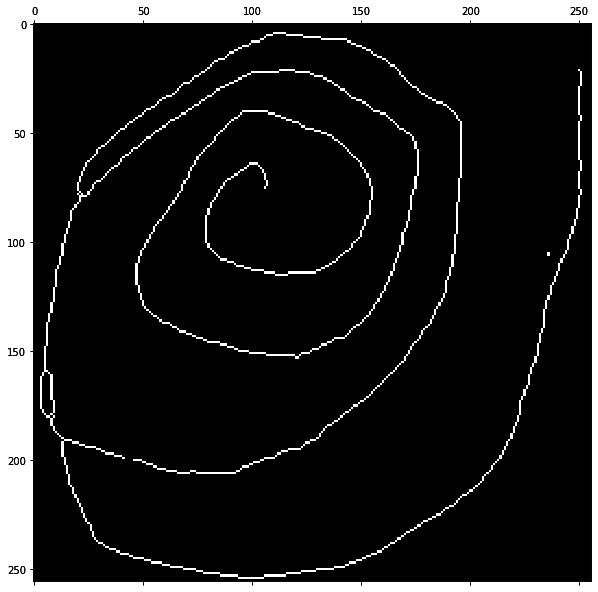

In [90]:
# perform gaussian blurring, then thin again
blur = cv2.blur(thinned, (3,3))
plt.figure(figsize=(10,10))
plt.matshow(blur, fignum=1)
thinned = thin(blur, max_num_iter=200) * 255
plt.figure(figsize=(10,10))
plt.matshow(thinned, cmap='gray', fignum=1)